In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Student Depression Dataset.csv')


In [8]:
df.sample(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27642,139393,Female,22.0,Surat,Student,5.0,0.0,8.81,4.0,0.0,Less than 5 hours,Moderate,MSc,No,12.0,4.0,Yes,1
12831,64947,Male,30.0,Thane,Student,3.0,0.0,6.37,4.0,0.0,5-6 hours,Unhealthy,MSc,Yes,1.0,1.0,No,1
7128,35863,Female,29.0,Visakhapatnam,Student,2.0,0.0,5.85,2.0,0.0,5-6 hours,Moderate,LLB,No,7.0,2.0,No,0
3487,17450,Female,30.0,Kalyan,Student,2.0,0.0,5.74,4.0,0.0,7-8 hours,Moderate,M.Com,No,6.0,1.0,No,0
20255,102539,Female,26.0,Chennai,Student,5.0,0.0,6.42,4.0,0.0,Less than 5 hours,Healthy,MBA,No,11.0,2.0,Yes,0


In [10]:
df.shape

(27901, 18)

In [12]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [14]:
print(df['Work Pressure'].sum())
print(df['Job Satisfaction'].sum())

12.0
19.0


In [16]:
# droping Work Pressure, Job Satisfaction columns 
df=df.drop(['Work Pressure', 'Job Satisfaction'], axis=1)

##### Checking if Gender is effecting the result

In [19]:
pd.crosstab(df['Gender'],df['Depression'])

Depression,0,1
Gender,,
Female,5133,7221
Male,6432,9115


In [21]:
print(7221/5133)
print(9115/6432)
# that how we can say that gender does not any relevent effect the if student has depression or not

1.4067796610169492
1.4171330845771144


##### Checking if Age is effecting the result

In [23]:
import matplotlib.pyplot as plt

df['Age2']=df['Age'].apply(lambda x: '18-3' if x > 17 and x < 30 else '30 above')
pd.crosstab(df['Depression'],df['Age2'])

Age2,18-3,30 above
Depression,,
0,7289,4276
1,13368,2968


In [25]:
print(13368/(7289+13368))
print(2968/(4276+2968))

0.647141404850656
0.409718387631143


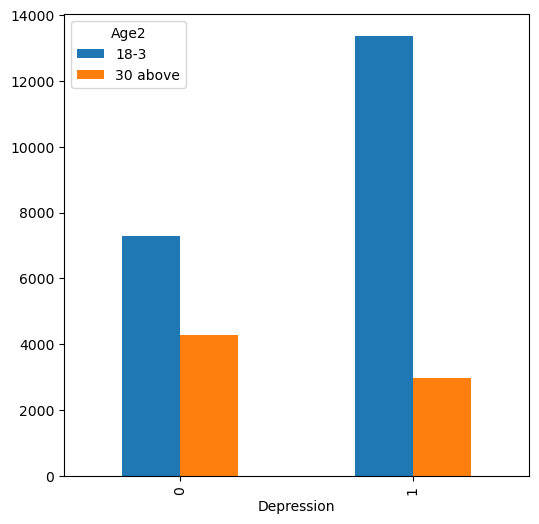

In [27]:
pd.crosstab(df['Depression'],df['Age2']).plot(kind='bar', figsize=(6, 6))
plt.xlabel='Depression'
plt.ylabel='count'
plt.title='age vs depression'

In [29]:
df=df.drop(['Age2'],axis=1)

In [30]:
# from above we would say students between age group 18-30 has slightly more possiblity of being in depression that the student of above age 30

##### Checking if degree is effecting the result

<Axes: xlabel='Degree'>

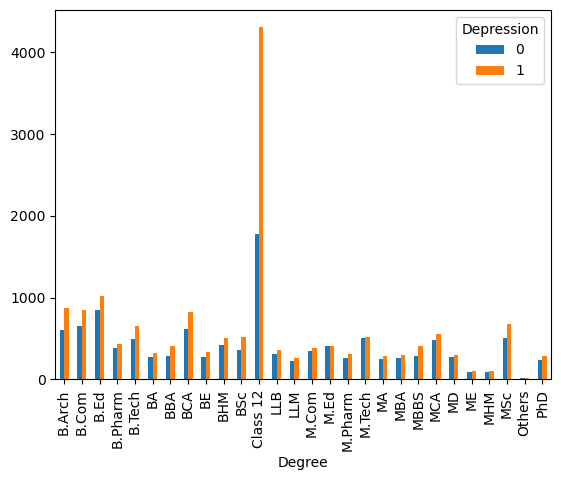

In [31]:
pd.crosstab(df['Degree'],df['Depression']).plot(kind='bar')

In [36]:
#### from above graph we would say degree is not majorly effecting the result expect class 12 has most major depresson casses

In [33]:
df=df[df['Profession']=='Student']

##### Dietary Habits effect on result

<Axes: xlabel='Dietary Habits'>

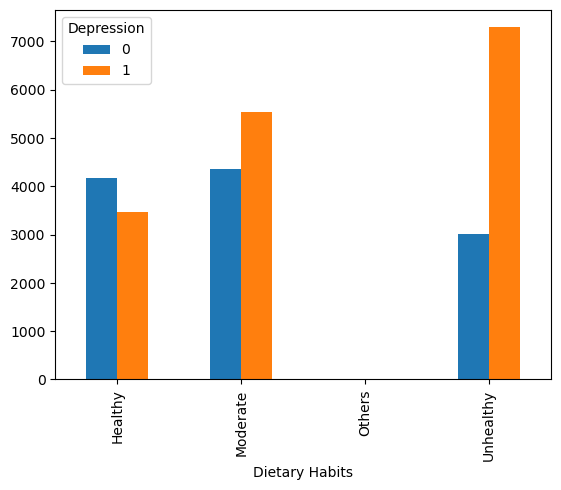

In [35]:
pd.crosstab(df['Dietary Habits'],df['Depression']).plot(kind='bar')

In [38]:
#dietary habits effecting the depression

In [37]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


##### financial Stress

In [39]:
print(df[(df['Financial Stress'] > 3) & (df['Depression'] == 1)].shape)
print(df[(df['Financial Stress'] > 3) & (df['Depression'] == 0)].shape)
print(df[(df['Financial Stress'] <3) & (df['Depression'] == 1)].shape)
print(df[(df['Financial Stress'] <3) & (df['Depression'] == 0)].shape)

(9433, 16)
(3041, 16)
(3800, 16)
(6374, 16)


In [41]:
#Proportion of Depression in High Financial Stress:
print(9428/(9428+3041))# proportion with depression 

0.7561151656107146


In [43]:
#Proportion of Depression in Low Financial Stress:
print(3798/(3798+6367))# proportion with depression 

0.3736350221347762


In [48]:
#financial stress is more likely leading to depression

##### sucidal thoughts

<Axes: xlabel='Have you ever had suicidal thoughts ?'>

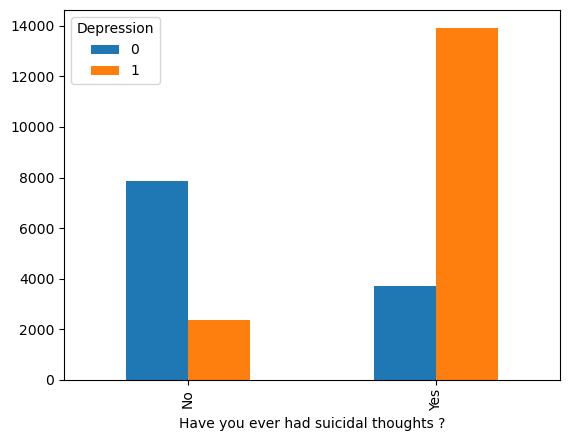

In [45]:
pd.crosstab(df['Have you ever had suicidal thoughts ?'],df['Depression']).plot(kind='bar')

In [52]:
# thoughts are effecting the depression

<Axes: xlabel='Family History of Mental Illness'>

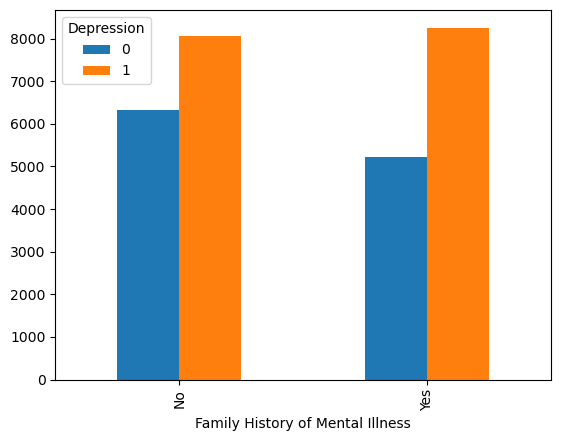

In [47]:
pd.crosstab(df['Family History of Mental Illness'],df['Depression']).plot(kind='bar')

In [56]:
# yes its effecting but not a severse effect

##### CGPA

In [49]:
df[(df['CGPA']>6 )&(df['Depression']==1)].shape
df[(df['CGPA']<6 )&(df['Depression']==1)].shape

(3003, 16)

In [51]:
df[(df['CGPA']<6 )&(df['Depression']==1)].shape 

(3003, 16)

In [53]:
# CGPA is not effceting 

##### Academic Pressure

In [55]:
print(df[(df['Academic Pressure']>=3) & (df['Depression']==1)].shape[0])
print(df[(df['Academic Pressure']>=3) & (df['Depression']==0)].shape[0])
print(df[(df['Academic Pressure']<3) & (df['Depression']==1)].shape[0])
print(df[(df['Academic Pressure']<3) & (df['Depression']==0)].shape[0])

13808
5077
2500
6485


In [57]:
print(13801/(13801+5071))
print(5071/(13801+5071) )
print(2498/(13801+5071))
print(6482/(13801+5071))

0.7312950402713014
0.2687049597286986
0.13236540907164052
0.3434718100890208


In [59]:
# Acamdemic Pressure is effecting

##### Study Satisfaction

In [61]:
df['Study Satisfaction'].max()

5.0

In [63]:
df[(df['Study Satisfaction']>=3) & (df['Depression']==1)].shape

(8685, 16)

In [65]:
df[df['Study Satisfaction']>=3].shape[0]

16579

In [67]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Age,Academic Pressure,Sleep Duration, Degree, Dietary Habits, Have you ever had suicidal thoughts ?,Financial Stress,Depression

In [69]:
df['Sleep Duration'].value_counts()
df=df[df['Sleep Duration']!='Others']

In [71]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8303
7-8 hours            7337
5-6 hours            6177
More than 8 hours    6035
Name: count, dtype: int64

In [73]:
df['Sleep Duration']=df['Sleep Duration'].apply(lambda x: 4 if x =='Less than 5 hours' else (7.5 if x =='7-8 hours'  else (5.5 if x=='5-6 hours' else 10)))

In [75]:
df[df['Dietary Habits']=='Others'].shape[0]

12

In [77]:
df=df[df['Dietary Habits']!='Others']

In [79]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5.5,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,4.0,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7.5,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5.5,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [81]:
df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x=='Yes' else 0)

In [83]:
df_train=df[['Age','Academic Pressure','Sleep Duration','Dietary Habits', 'Have you ever had suicidal thoughts ?']]
df_depression=df[['Depression']]
df_train.head()

,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?
0,33.0,5.0,5.5,Healthy,1
1,24.0,2.0,5.5,Moderate,0
2,31.0,3.0,4.0,Healthy,0
3,28.0,3.0,7.5,Moderate,1
4,25.0,4.0,5.5,Moderate,1


##### using one hot encoding for Dietary habits

In [85]:
dummies=pd.get_dummies(df['Dietary Habits']).astype('int8')

In [87]:
## concating the dummies and the df-train
df_train=pd.concat([df_train, dummies],axis=1)
df_train.head()

,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Healthy,Moderate,Unhealthy
0,33.0,5.0,5.5,Healthy,1,1,0,0
1,24.0,2.0,5.5,Moderate,0,0,1,0
2,31.0,3.0,4.0,Healthy,0,1,0,0
3,28.0,3.0,7.5,Moderate,1,0,1,0
4,25.0,4.0,5.5,Moderate,1,0,1,0


In [89]:
## deleting column Dietary Habits and one dummy column to avoid dummy variable trap
df_train=df_train.drop(['Dietary Habits','Unhealthy'], axis=1)

In [91]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [115]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df_train,df_depression)

In [95]:
model= linear_model.LinearRegression()

In [97]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [99]:
model.score(Xtest,Ytest)

0.4479973151726133

In [101]:
model1=linear_model.LogisticRegression()

In [103]:
model1.fit(Xtrain,Ytrain)

LogisticRegression()

In [105]:
model.score(Xtest,Ytest)

0.4479973151726133

In [107]:
from sklearn.naive_bayes import MultinomialNB

In [117]:
model2=MultinomialNB(alpha=1)

In [119]:
model2.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1)

In [121]:
model2.score(Xtest,Ytest)

0.8004310344827587

In [123]:
Y=model2.predict(Xtest)

In [125]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [127]:
from sklearn.metrics import confusion_matrix

In [129]:
cm=confusion_matrix(Ytest,Y)

In [131]:
cm

array([[1875, 1038],
       [ 351, 3696]], dtype=int64)

In [133]:
import seaborn as snb

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

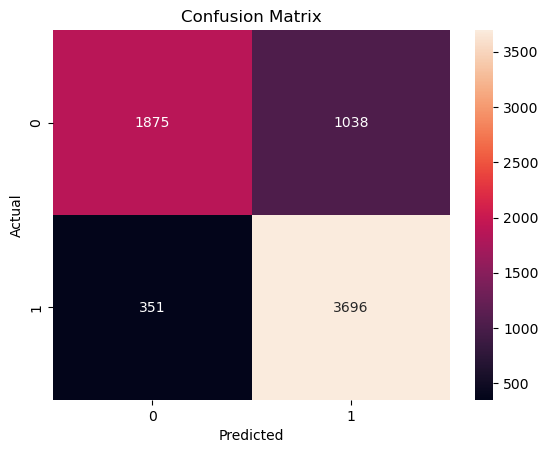

In [149]:
ax = snb.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix');
